# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Starting URL for OpenWeatherMap API call
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"

url_request = f"{url}appid={weather_api_key}&units={unit}&q=" 


# weather_response = requests.get(url_request)
# print(weather_response)

In [5]:
# Make empty lists to store the data
cityname = []
lat = []
lng = []
date = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []

record = 0
sets = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# Iterate through the cities

# JSON returns data from cities laid within definite circle that is specified by 
# center point ('lat', 'lon') and expected number of cities ('cnt') 
# around this point. The default number of cities is 10, the maximum is 50.
        

for city in cities:
    try:
        weather_response = requests.get(url_request+city).json()
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        
        if record >= 49:
            record = 0
            sets += 1
            cityname.append(city)
        else:
            record += 1
            cityname.append(city)
        print(f"Processing Record {record} of Set {sets} | {city}")
        
    except Exception:
        print(f"City not found. Skipping...")

print("-------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | alta gracia
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | caravelas
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | corralillo
Processing Record 6 of Set 1 | sola
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | ariquemes
Processing Record 9 of Set 1 | quelimane
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | ust-tsilma
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | tigil
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | albany
City not found. Skipping...
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | saint-augustin
Processing Record 21 of Set 1 | novobirilyussy
Processing Record 22 of Set 1 | zhuzhou
Proces

Processing Record 36 of Set 4 | neuquen
Processing Record 37 of Set 4 | kahului
Processing Record 38 of Set 4 | saint george
Processing Record 39 of Set 4 | san borja
Processing Record 40 of Set 4 | cortez
City not found. Skipping...
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | senno
Processing Record 43 of Set 4 | shimoda
Processing Record 44 of Set 4 | mundo nuevo
Processing Record 45 of Set 4 | elizabeth city
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | east london
Processing Record 48 of Set 4 | rivadavia
Processing Record 49 of Set 4 | vrontados
Processing Record 0 of Set 5 | upernavik
Processing Record 1 of Set 5 | mar del plata
Processing Record 2 of Set 5 | sulangan
Processing Record 3 of Set 5 | ampanihy
Processing Record 4 of Set 5 | abu kamal
Processing Record 5 of Set 5 | cayenne
Processing Record 6 of Set 5 | yeppoon
Processing Record 7 of Set 5 | grootfontein
Processing Record 8 of Set 5 | san patricio
Processing Record 9 

Processing Record 28 of Set 8 | kirakira
Processing Record 29 of Set 8 | vila velha
City not found. Skipping...
Processing Record 30 of Set 8 | boyabat
Processing Record 31 of Set 8 | lingao
Processing Record 32 of Set 8 | san rafael
Processing Record 33 of Set 8 | mumford
Processing Record 34 of Set 8 | russkaya polyana
Processing Record 35 of Set 8 | alta
Processing Record 36 of Set 8 | urumqi
Processing Record 37 of Set 8 | noumea
Processing Record 38 of Set 8 | half moon bay
Processing Record 39 of Set 8 | lai
Processing Record 40 of Set 8 | toamasina
Processing Record 41 of Set 8 | cervo
Processing Record 42 of Set 8 | halifax
Processing Record 43 of Set 8 | kattivakkam
Processing Record 44 of Set 8 | sampit
Processing Record 45 of Set 8 | the pas
City not found. Skipping...
Processing Record 46 of Set 8 | acaponeta
Processing Record 47 of Set 8 | bubaque
Processing Record 48 of Set 8 | guerrero negro
Processing Record 49 of Set 8 | villa carlos paz
Processing Record 0 of Set 9 | 

Processing Record 14 of Set 12 | gayny
Processing Record 15 of Set 12 | snasa
City not found. Skipping...
Processing Record 16 of Set 12 | porto seguro
Processing Record 17 of Set 12 | rohtak
Processing Record 18 of Set 12 | cairns
Processing Record 19 of Set 12 | japura
Processing Record 20 of Set 12 | saldanha
City not found. Skipping...
Processing Record 21 of Set 12 | green river
Processing Record 22 of Set 12 | grand gaube
Processing Record 23 of Set 12 | olinda
Processing Record 24 of Set 12 | blagoveshchensk
City not found. Skipping...
-------------------------------
Data Retrieval Complete
--------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create dictionary
weather_dict = {
    "City": cityname,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed
}

# Create DataFrame

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          574
Cloudiness    574
Country       574
Date          574
Humidity      574
Lat           574
Lng           574
Max Temp      574
Wind Speed    574
dtype: int64

In [7]:
weather_df.head(50)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,alta gracia,0,AR,1589134328,31,-31.65,-64.43,79.00,16.11
1,chuy,37,UY,1589134329,51,-33.70,-53.46,73.63,10.51
2,caravelas,49,BR,1589134304,59,-17.71,-39.25,76.46,9.98
3,busselton,80,AU,1589134331,70,-33.65,115.33,48.00,2.68
4,corralillo,100,CU,1589134332,84,22.98,-80.59,77.22,2.98
5,sola,96,VU,1589134333,83,-13.88,167.55,79.97,19.10
6,tuktoyaktuk,75,CA,1589134335,80,69.45,-133.04,33.80,14.99
7,ariquemes,22,BR,1589134335,60,-9.91,-63.04,88.36,0.54
8,quelimane,75,MZ,1589134337,88,-17.88,36.89,73.40,11.41
9,puerto ayora,20,EC,1589134338,66,-0.74,-90.35,86.00,13.87


In [8]:
weather_df.to_csv("weather_df.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

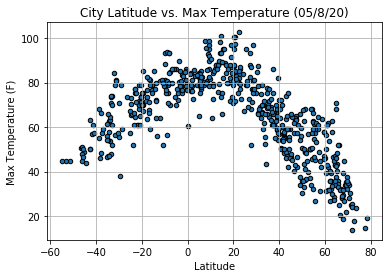

In [9]:
weather_df.plot(kind="scatter", x="Lat", y="Max Temp",figsize=(6,4), marker='o', grid=True,edgecolors="black", title="City Latitude vs. Max Temperature (05/8/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("LatvsTemp.png")
plt.show()

This plot shows the relationship between latittude and temperature in the selected cities.

We can see that the closer a city is to the equator, the higher the max temperature.

#### Latitude vs. Humidity Plot

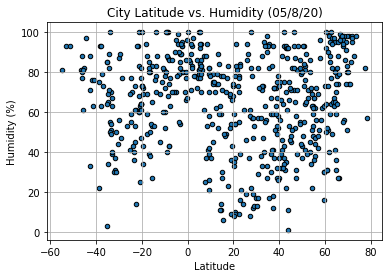

In [10]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity",figsize=(6,4), marker='o', grid=True,edgecolors="black", title="City Latitude vs. Humidity (05/8/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("LatvsHum.png")
plt.show()

This plot shows the relationship between latittude and humidity in the selected cities.

Locations south of the equator seem to have higher humidity, while it is more varied above the equator.

#### Latitude vs. Cloudiness Plot

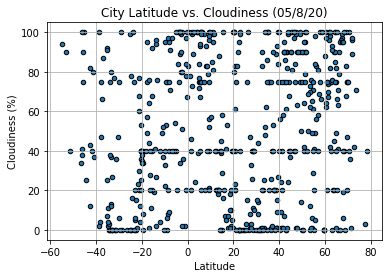

In [11]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness",figsize=(6,4), marker='o', grid=True,edgecolors="black", title="City Latitude vs. Cloudiness (05/8/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("LatvsCloudiness.png")
plt.show()

This plot shows the relationship between latittude and cloudiness in the selected cities.

Latitude does not seem to have a trend in the cloudiness

#### Latitude vs. Wind Speed Plot

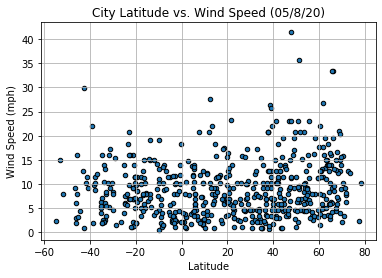

In [12]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed",figsize=(6,4), marker='o', grid=True,edgecolors="black", title="City Latitude vs. Wind Speed (05/8/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("LatvsWind.png")
plt.show()

This plot shows the relationship between latittude and wind speed in the selected cities.

The wind speed seems to be slightly higher above the equator

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def line_reg_hw(x_values,y_values,x_desc,y_desc,x_ann,y_ann):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    print(f"The r-squared is: {rvalue}")

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"]>=0]
southern_hemisphere = weather_df.loc[weather_df["Lat"]<0]

northern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,corralillo,100,CU,1589134332,84,22.98,-80.59,77.22,2.98
6,tuktoyaktuk,75,CA,1589134335,80,69.45,-133.04,33.80,14.99
10,ust-tsilma,66,RU,1589134339,78,65.44,52.15,43.52,6.38
12,jamestown,90,US,1589134331,37,42.10,-79.24,55.99,18.34
15,tigil,100,RU,1589134346,96,57.80,158.67,31.10,16.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8557829468826699


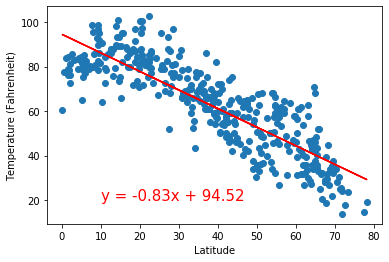

In [16]:
line_reg_hw(
    northern_hemisphere["Lat"],
    northern_hemisphere["Max Temp"],
    "Latitude",
    "Temperature (Fahrenheit)",10,20)

plt.savefig("NHLatvsTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7560868475011773


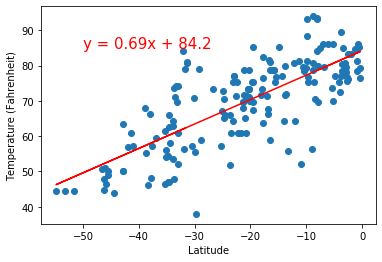

In [19]:
line_reg_hw(
    southern_hemisphere["Lat"],
    southern_hemisphere["Max Temp"],
    "Latitude","Temperature (Fahrenheit)",
    -50,85)

plt.savefig("SHLatvsTemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10002760862649647


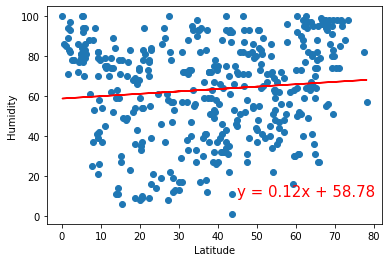

In [20]:
line_reg_hw(
    northern_hemisphere["Lat"],
    northern_hemisphere["Humidity"],
    "Latitude","Humidity",
    45,10)

plt.savefig("NHLatvsHum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17783652824069193


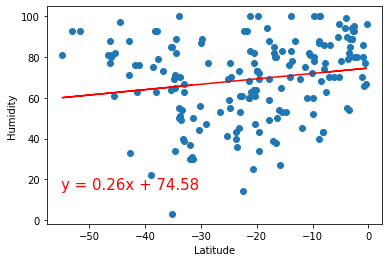

In [22]:
line_reg_hw(
    southern_hemisphere["Lat"],
    southern_hemisphere["Humidity"],
    "Latitude","Humidity",
    -55,15)

plt.savefig("SHLatvsHum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07022282855543316


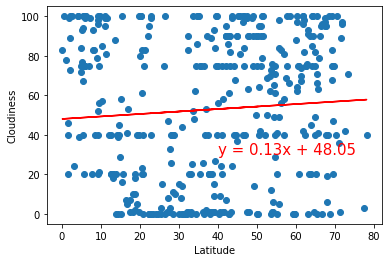

In [23]:
line_reg_hw(
    northern_hemisphere["Lat"],
    northern_hemisphere["Cloudiness"],
    "Latitude","Cloudiness",
    40,30)

plt.savefig("NHLatvsCloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17437090032705402


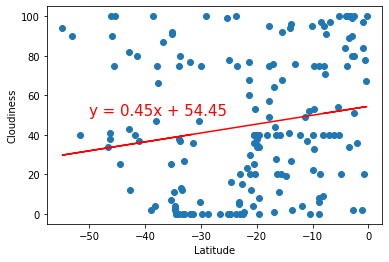

In [24]:
line_reg_hw(
    southern_hemisphere["Lat"],
    southern_hemisphere["Cloudiness"],
    "Latitude","Cloudiness",
    -50,50)

plt.savefig("SHLatvsCloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20431324441890925


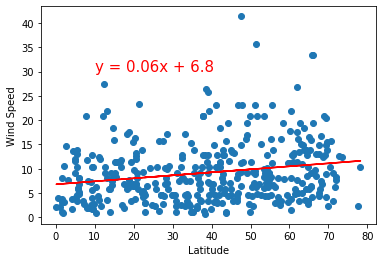

In [26]:
line_reg_hw(
    northern_hemisphere["Lat"],
    northern_hemisphere["Wind Speed"],
    "Latitude","Wind Speed",
    10,30)

plt.savefig("NHLatvsWind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.06829983705366313


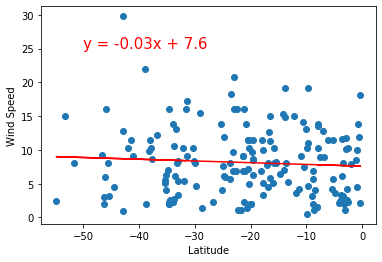

In [28]:
line_reg_hw(
    southern_hemisphere["Lat"],
    southern_hemisphere["Wind Speed"],
    "Latitude","Wind Speed",
    -50,25)

plt.savefig("SHLatvsWind.png")
plt.show()